In [50]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from visualisations.plot_zonal_spectrum import compute_zonal_spectrum


In [51]:
# train_date_start: 1979-01-01
# train_date_end: 2012-12-31T18:00

path = '/home/adboer/dlwp-hpx/src/dlwp-hpx/remap/era5_1deg_1D_spatial_norm2_t2m.nc'
# Open the NetCDF file
data = xr.open_dataset(path)
# Select the time period from 1979 to 2016
var = 't2m'

In [37]:
# Select the latitude range
variable = data[var].sel(latitude=slice(50,40))

# Calculate the mean along the latitude dimension
variable_mean = variable.mean(dim='latitude')

# Create a new coordinate for latitude
new_lat = xr.DataArray([45], dims='latitude', coords={'latitude': [45]})

# Assign the mean values to the new latitude coordinate
variable = variable_mean.expand_dims({'latitude': new_lat})

# Apply FFT along the longitude dimension
fft_result = np.fft.fft(variable.values, axis=variable.get_axis_num('longitude')) # over second dimension

# Compute amplitude spectrum
amplitude_spectrum =  np.abs(fft_result)

# Create a new DataArray with the amplitude spectrum
fft_da = xr.DataArray(amplitude_spectrum, coords=variable.coords, dims=variable.dims)


fft_da_subset = fft_da 

fig, ax = plt.subplots(figsize=(20, 10))

# Prepare data for boxplot
data = []
for lat in fft_da_subset.latitude.values:
    for wn in range(1, 15):  # Adjust range as needed
        amplitudes = fft_da_subset.sel(latitude=lat).isel(longitude=wn).values
        data.extend([(lat, wn, amp) for amp in amplitudes])

# Create DataFrame
df = pd.DataFrame(data, columns=['Latitude', 'Wavenumber', 'Amplitude'])

# Create boxplot
sns.boxplot(x='Wavenumber', y='Amplitude', hue='Latitude', data=df, ax=ax)

# Customize the plot
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Amplitude')
ax.set_title(f'Zonal FFT Amplitude Spectrum Distribution, {var}')
ax.legend(title='Latitude')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(0, 8)

plt.tight_layout()
plt.show()


In [31]:
zonalds = compute_zonal_spectrum(data.sel(time=slice('2022-01-01', '2023-12-31T18:00')), 't2m')
zonalds2 = compute_zonal_spectrum(data.sel(time=slice('1945-01-01', '1949-12-31T18:00')), 't2m')

In [32]:
zonalds.frequency.sel(latitude=45, method='nearest')

<xarray.DataArray 'frequency' (zonal_wavenumber: 181)> Size: 1kB
array([0.00000000e+00, 3.53481081e-08, 7.06962162e-08, 1.06044324e-07,
       1.41392432e-07, 1.76740541e-07, 2.12088649e-07, 2.47436757e-07,
       2.82784865e-07, 3.18132973e-07, 3.53481081e-07, 3.88829189e-07,
       4.24177297e-07, 4.59525405e-07, 4.94873514e-07, 5.30221622e-07,
       5.65569730e-07, 6.00917838e-07, 6.36265946e-07, 6.71614054e-07,
       7.06962162e-07, 7.42310270e-07, 7.77658378e-07, 8.13006487e-07,
       8.48354595e-07, 8.83702703e-07, 9.19050811e-07, 9.54398919e-07,
       9.89747027e-07, 1.02509514e-06, 1.06044324e-06, 1.09579135e-06,
       1.13113946e-06, 1.16648757e-06, 1.20183568e-06, 1.23718378e-06,
       1.27253189e-06, 1.30788000e-06, 1.34322811e-06, 1.37857622e-06,
       1.41392432e-06, 1.44927243e-06, 1.48462054e-06, 1.51996865e-06,
       1.55531676e-06, 1.59066487e-06, 1.62601297e-06, 1.66136108e-06,
       1.69670919e-06, 1.73205730e-06, 1.76740541e-06, 1.80275351e-06,
       1.83810162e-06, 1.87344973e-06, 1.90879784e-06, 1.94414595e-06,
       1.97949405e-06, 2.01484216e-06, 2.05019027e-06, 2.08553838e-06,
       2.12088649e-06, 2.15623459e-06, 2.19158270e-06, 2.22693081e-06,
       2.26227892e-06, 2.29762703e-06, 2.33297514e-06, 2.36832324e-06,
       2.40367135e-06, 2.43901946e-06, 2.47436757e-06, 2.50971568e-06,
       2.54506378e-06, 2.58041189e-06, 2.61576000e-06, 2.65110811e-06,
       2.68645622e-06, 2.72180432e-06, 2.75715243e-06, 2.79250054e-06,
...
       3.67620324e-06, 3.71155135e-06, 3.74689946e-06, 3.78224757e-06,
       3.81759568e-06, 3.85294378e-06, 3.88829189e-06, 3.92364000e-06,
       3.95898811e-06, 3.99433622e-06, 4.02968432e-06, 4.06503243e-06,
       4.10038054e-06, 4.13572865e-06, 4.17107676e-06, 4.20642487e-06,
       4.24177297e-06, 4.27712108e-06, 4.31246919e-06, 4.34781730e-06,
       4.38316541e-06, 4.41851351e-06, 4.45386162e-06, 4.48920973e-06,
       4.52455784e-06, 4.55990595e-06, 4.59525405e-06, 4.63060216e-06,
       4.66595027e-06, 4.70129838e-06, 4.73664649e-06, 4.77199460e-06,
       4.80734270e-06, 4.84269081e-06, 4.87803892e-06, 4.91338703e-06,
       4.94873514e-06, 4.98408324e-06, 5.01943135e-06, 5.05477946e-06,
       5.09012757e-06, 5.12547568e-06, 5.16082378e-06, 5.19617189e-06,
       5.23152000e-06, 5.26686811e-06, 5.30221622e-06, 5.33756433e-06,
       5.37291243e-06, 5.40826054e-06, 5.44360865e-06, 5.47895676e-06,
       5.51430487e-06, 5.54965297e-06, 5.58500108e-06, 5.62034919e-06,
       5.65569730e-06, 5.69104541e-06, 5.72639351e-06, 5.76174162e-06,
       5.79708973e-06, 5.83243784e-06, 5.86778595e-06, 5.90313405e-06,
       5.93848216e-06, 5.97383027e-06, 6.00917838e-06, 6.04452649e-06,
       6.07987460e-06, 6.11522270e-06, 6.15057081e-06, 6.18591892e-06,
       6.22126703e-06, 6.25661514e-06, 6.29196324e-06, 6.32731135e-06,
       6.36265946e-06])
Coordinates:
    latitude          float32 4B 45.0
  * zonal_wavenumber  (zonal_wavenumber) int64 1kB 0 1 2 3 4 ... 177 178 179 180
    frequency         (zonal_wavenumber) float64 1kB 0.0 3.535e-08 ... 6.363e-06
    wavelength        (zonal_wavenumber) float64 1kB inf 2.829e+07 ... 1.572e+05
Attributes:
    units:    1 / m

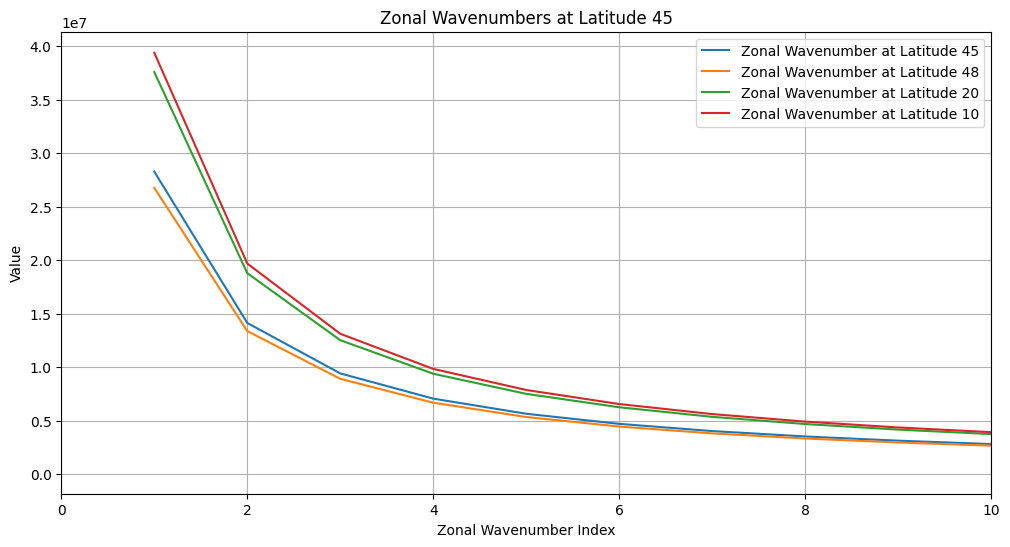

In [35]:
# Step 5: Plotting
plt.figure(figsize=(12, 6))
plt.plot(zonalds.wavelength.sel(latitude=45, method='nearest'), label='Zonal Wavenumber at Latitude 45')
plt.plot(zonalds.wavelength.sel(latitude=48, method='nearest'), label='Zonal Wavenumber at Latitude 48')
plt.plot(zonalds.wavelength.sel(latitude=20, method='nearest'), label='Zonal Wavenumber at Latitude 20')
plt.plot(zonalds.wavelength.sel(latitude=10, method='nearest'), label='Zonal Wavenumber at Latitude 10')
#plt.plot(zonalds2.wavelength.sel(latitude=45, method='nearest'), label='Zonal Wavenumber2 at Latitude 45')
#plt.plot(zonalds2.wavelength.sel(latitude=48, method='nearest'), label='Zonal Wavenumber2 at Latitude 48')
#plt.plot(zonalds2.wavelength.sel(latitude=20, method='nearest'), label='Zonal Wavenumber2 at Latitude 20')
#plt.plot(zonalds2.wavelength.sel(latitude=10, method='nearest'), label='Zonal Wavenumber2 at Latitude 10')
plt.title('Zonal Wavenumbers at Latitude 45')
plt.xlabel('Zonal Wavenumber Index')
plt.ylabel('Value')
plt.xlim(0, 10) 
plt.legend()
plt.grid()
plt.show()

In [12]:

# Step 2: Extract the zonal wavenumber data for latitude 45
# Assuming 'zonal_wavenumber' is a variable in your dataset
# and 'latitude' is one of the dimensions
wavenumbers_at_lat_45 = zonalds.zonal_wavenumber.sel(latitude=45)

# Step 3: Plotting
plt.figure(figsize=(12, 6))
plt.plot(wavenumbers_at_lat_45['time'], wavenumbers_at_lat_45, label='Zonal Wavenumber at Latitude 45')

plt.title('Zonal Wavenumbers at Latitude 45')
plt.xlabel('Time')
plt.ylabel('Zonal Wavenumber')
plt.legend()
plt.grid()
plt.show()

KeyError: "'latitude' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'zonal_wavenumber': 181})"

In [2]:



# Step 3: Replace zeros with the minimum value
min_value = data.where(data != 0).min(skipna=True)
data_filled = data.where(data != 0, np.NaN)
data = data_filled

# Calculate the mean over the selected time period
mean_data = data_subset.t2m.mean(dim ='sample') #sample='time'

new_data = (data.t2m /  mean_data) 



In [5]:


min_value = data.t2m.where(data != 0).min(skipna=True)

data = new_data 
# Step 3: Replace zeros with the minimum value
#data_filled = data.where(data != np.nan, min_value)
data_filled = data.fillna(min_value)

data_filled.to_netcdf('era5_1deg_1D_HPX64_norm_2tm.nc')